In [32]:
import os 
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from networkx.drawing.nx_agraph import graphviz_layout

In [33]:
%matplotlib inline


In [34]:
with open("package-lock.json") as f:
        packageLockFile = json.load(f)
dependencies = packageLockFile['dependencies']

In [35]:
packageName = list(dependencies.keys())[0]
fileName = packageLockFile['name']
nodeName = packageName+'@'+dependencies[packageName]['version']

In [43]:
print (packageName)

@bentley/imodeljs-backend


In [36]:
def makeGraph(queue, graph):
    if (len(queue)) == 0:
        return
    n = queue.popleft()
    node = n+'@'+dependencies[n]['version']
    graph.add_node(node)

    if dependencies[n].get('requires'):
        
        for i in dependencies[n]["requires"]:
#             graph.add_edges_from([(node,i+'@'+dependencies[n]["requires"][i])])
            graph.add_edges_from([(node,i+'@'+dependencies[i]["version"])],attr_dict={'length':100,'weight':50})
            queue.append(i)
    makeGraph(queue, graph)

In [37]:
G = nx.DiGraph()
q = deque([list(dependencies.keys())[0]])
makeGraph(q, G)


In [38]:


# plt.figure(num=None, figsize=(10, 10), dpi=150, facecolor='w', edgecolor='k')
# pos = nx.draw_circular(G, with_labels=True, arrowstyle = '->', arrowsize = 7, node_size = 500,
#                node_color=np.arange(0, len(G.nodes())), node_shape = 'h', alpha = 0.8,
#               edge_color = 'green', font_color ='red', font_weight ='heavy')
# # nx.draw_networkx()

# plt.savefig('dependency_graph1.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dependency_graph_@bentley/imodeljs-backend@0.97.2.png'

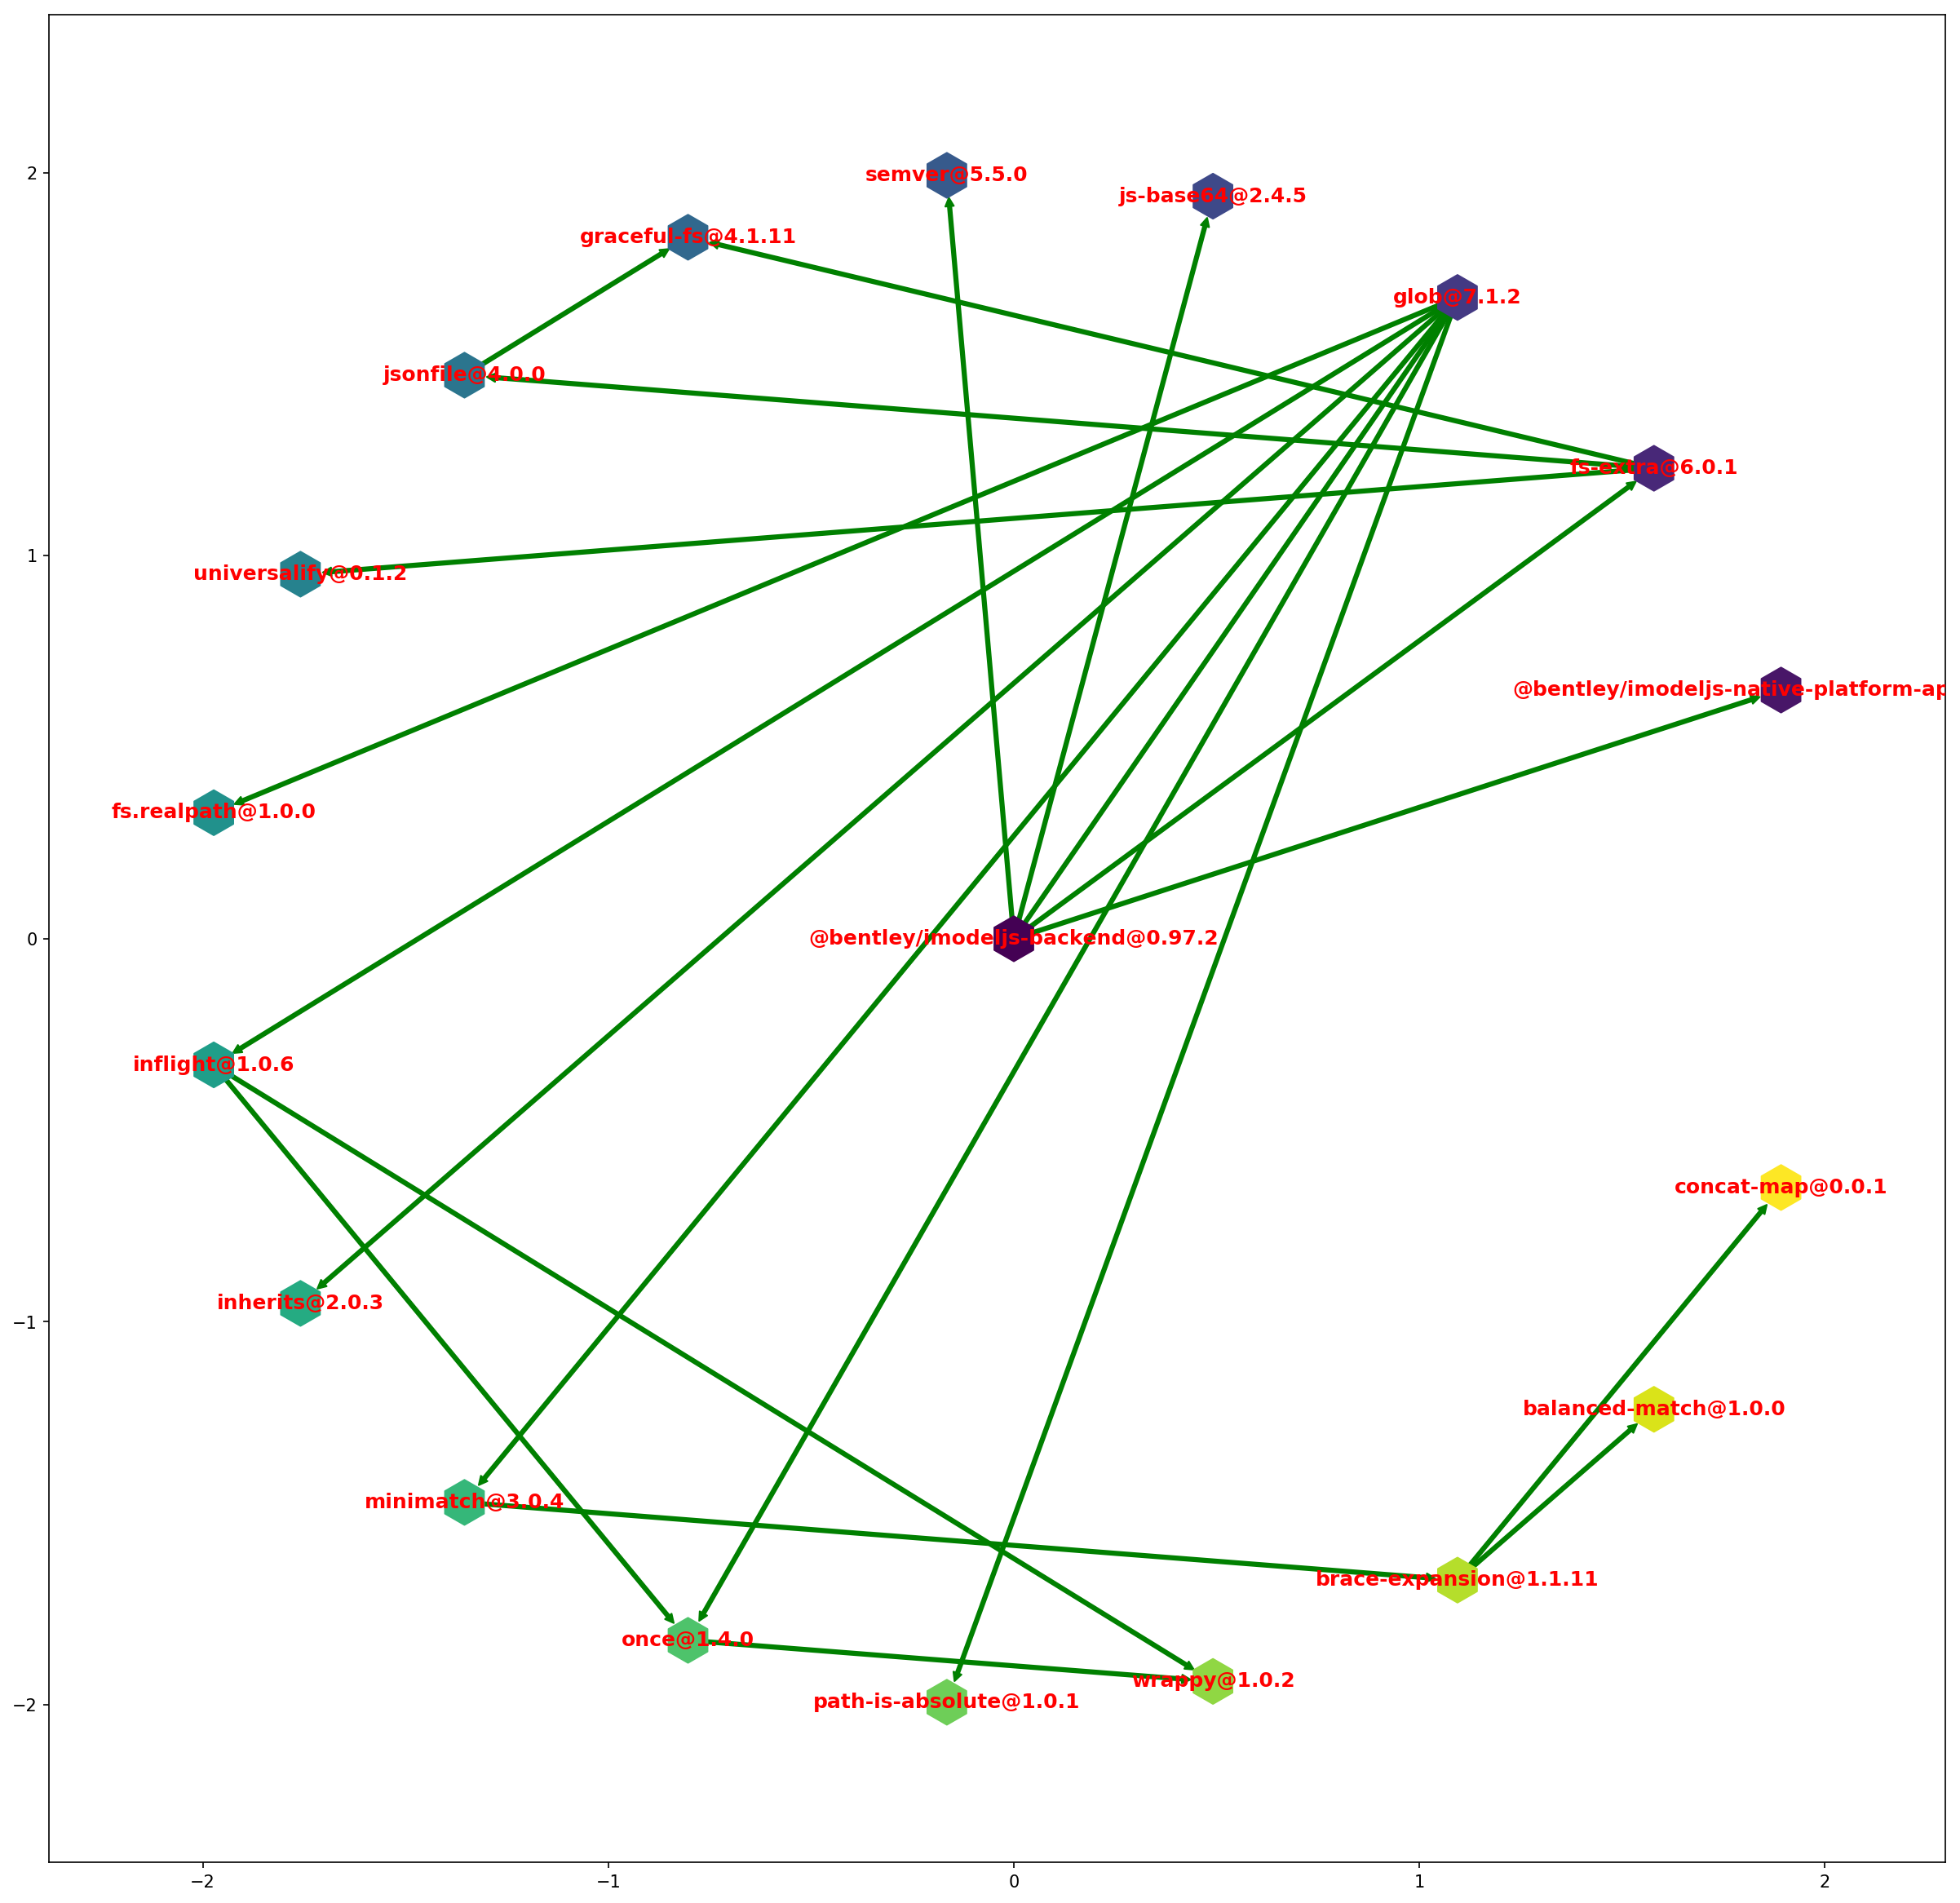

In [42]:


plt.figure(num=None, figsize=(20, 20), dpi=150, facecolor='w', edgecolor='k')
pos = nx.circular_layout(G, scale=2)

# pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)

pos[nodeName] = [0, 0]


nx.draw_networkx(G, pos, with_labels=True, arrowstyle = 'simple', arrowsize = 10, node_size = 700,
               node_color=np.arange(0, len(G.nodes())), node_shape = 'h', alpha = 1,
              edge_color = 'green', font_color ='red', scale = 15, font_weight = 'heavy')

plt.savefig('dependency_graph.png')